# import packages

In [37]:
import pandas as pd


# read xlsx

### read DATA

In [38]:
# read DATA
file_path = "../data/業務員資料0325V01.xlsx"
df_DATA = pd.read_excel(file_path, sheet_name="DATA",engine='openpyxl')
df_DATA

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
0,agnt_0001,M,DEPT3,AREA13,CNTR13,K7,3,30054.25,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
1,agnt_0002,M,DEPT2,AREA18,CNTR12,HA,1,68389.32,100.0,NaN,...,0,0,3,0,0,1,0,0,0,N
2,agnt_0003,M,DEPT3,AREA13,CNTR13,Z1,2,14618.46,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
3,agnt_0004,M,DEPT3,AREA13,CNTR35,Z1,2,42400.30,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
4,agnt_0005,M,DEPT3,AREA13,CNTR35,Z1,1,23869.50,0.0,NaN,...,0,0,0,0,0,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,agnt_4015,F,DEPT3,AREA13,CNTR13,Z1,2,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N
4015,agnt_4016,F,DEPT3,AREA14,CNTR17,Z1,2,44524.35,NaN,NaN,...,0,0,3,0,0,1,1,0,0,N
4016,agnt_4017,M,DEPT3,AREA13,CNTR35,KA,2,36144.52,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N
4017,agnt_4018,F,DEPT2,AREA21,CNTR14,Z1,2,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N


看全部有哪些column

In [39]:
print(df_DATA.columns)

Index(['serial_no', 'gender', 'dept_flg', 'area_flg', 'cntr_flg',
       'agent_level', 'agent_status', 'fyp_month_avg', 'persistence_prem_25',
       'salary_ded_ratio', 'xagfd_flag', 'xagdt_flag', 'age',
       'register_until_now', 'bill_invalid_ratio', 'bill_invalid_cnt',
       'agent_own_plcy', 'one_year_claim_plcy_cnt',
       'one_year_claim_plcy_ratio', 'addr_not_vld_rate', 'comm_amount_1y_rate',
       'pc_in_60_days_rate', 'lapse_2y_rate', 'cusp_own_flag',
       'cusp_intr_flag', 'rule1_counts', 'rule2_counts', 'rule3_counts',
       'rule4_counts', 'rule5_counts', 'rule6_counts', 'rule7_counts',
       'rule8_counts', 'rule9_counts', 'rule10_counts', 'rule11_counts',
       'rule12_counts', 'rule13_counts', 'rule14_counts', 'rule15_counts',
       'rule16_counts', 'rule17_counts', 'rule18_counts', 'rule19_counts',
       'rule20_counts', 'rule21_counts', 'rule22_counts', 'rule23_counts',
       'rule24_counts', 'rule25_counts', 'rule26_counts', 'rule27_counts',
       'rul

In [40]:
print((df_DATA['abnormal_target'] == 'Y').sum())

38


### read schema

In [41]:
# read schema
file_path = "../data/業務員資料0325V01.xlsx"
df_schema = pd.read_excel(file_path, sheet_name="schema",engine='openpyxl')
df_schema

,欄位英文,欄位中文,型別
0,SERIAL_NO,業務員流水號,NaN
1,GENDER,性別,類別型
2,DEPT_FLG,招攬部室代號,類別型
3,AREA_FLG,招攬區部代號,類別型
4,CNTR_FLG,招攬單位代號,類別型
...,...,...,...
60,RULE36_COUNTS,業務員符合規則36的次數,連續型
61,RULE37_COUNTS,業務員符合規則37的次數,連續型
62,RULE38_COUNTS,業務員符合規則38的次數,連續型
63,RULE39_COUNTS,業務員符合規則39的次數,連續型


### read 規則對照表

In [42]:
# read 規則對照表
file_path = "../data/業務員資料0325V01.xlsx"
df_rule = pd.read_excel(file_path, sheet_name="規則對照表",engine='openpyxl')
df_rule

,規則代號,規則中文,代碼中文說明
0,RULE1,規則1,業務員職務為業務襄理或業務副理或區經理者
1,RULE2,規則2,催告退回比率大於3%(地址異動)
2,RULE3,規則3,同一要保人近6個月內之保全異動次數大於10次
3,RULE4,規則4,業務員手上招攬件的保單狀況為停效、失效、自動墊繳、繳清的比例大於30%
4,RULE5,規則5,保單生效後1年內申請賠償請求的保單數量
5,RULE6,規則6,催告退回比率大於3%(主招)
6,RULE7,規則7,催告退回比率大於3%(服務)
7,RULE8,規則8,收費員送金單作廢率大於8%且張數大於3
8,RULE9,規則9,三次件綜合收取率未達85%
9,RULE10,規則10,二次件綜合收取率未達85%


# 資料前處理

## 紅色是abnormal_target = Y 綠色是abnormal_target = N

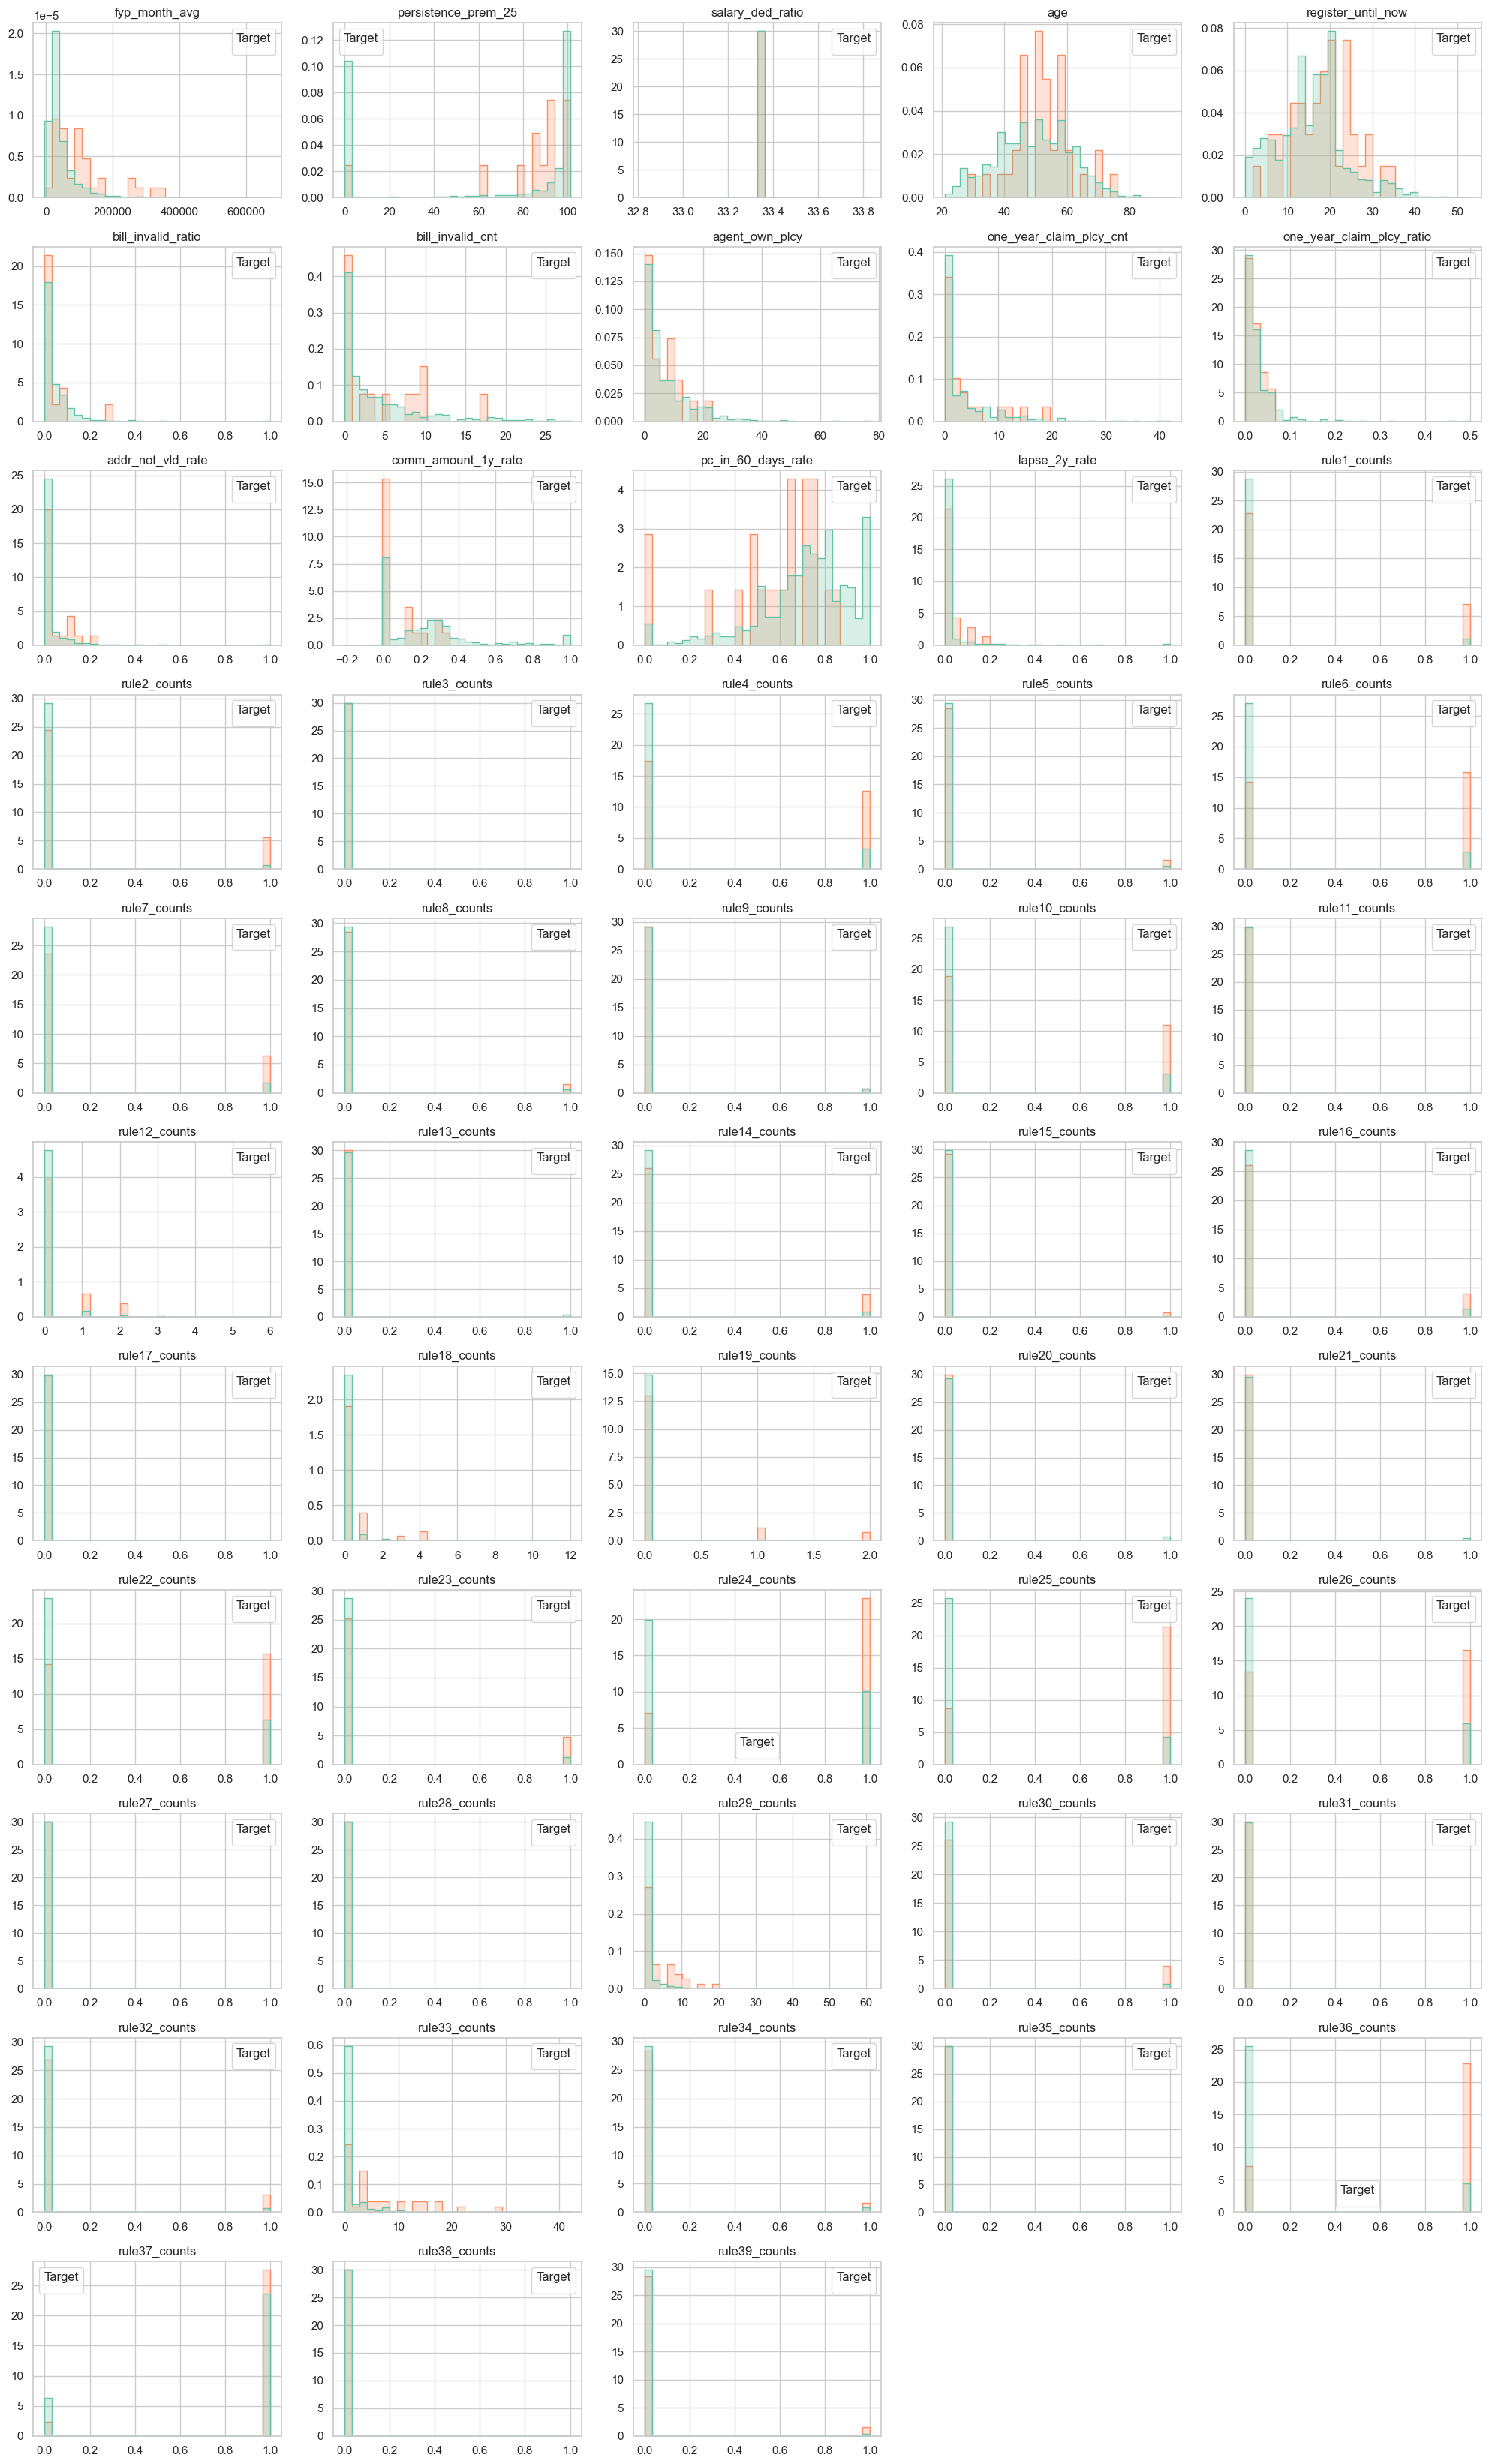

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from math import ceil

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# 讀取資料
file_path = "../data/業務員資料0325V01.xlsx"
df_DATA = pd.read_excel(file_path, sheet_name="DATA", engine="openpyxl")
df_DATA["abnormal_target"] = df_DATA["abnormal_target"].map({"N": 0, "Y": 1})

# 欄位清單
continuous_columns = [
    "fyp_month_avg", "persistence_prem_25", "salary_ded_ratio", "age", "register_until_now",
    "bill_invalid_ratio", "bill_invalid_cnt", "agent_own_plcy", "one_year_claim_plcy_cnt",
    "one_year_claim_plcy_ratio", "addr_not_vld_rate", "comm_amount_1y_rate", "pc_in_60_days_rate",
    "lapse_2y_rate"
] + [f"rule{i}_counts" for i in range(1, 40)]

# 儲存圖片的資料夾
os.makedirs("output_plots", exist_ok=True)

# 筆數設定（每列顯示幾張圖）
n_cols = 5
n_rows = ceil(len(continuous_columns) / n_cols)
figsize = (n_cols * 4, n_rows * 3)

# 建圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.flatten()

plotted = 0

for idx, col in enumerate(continuous_columns):
    if col not in df_DATA.columns:
        continue

    temp_df = df_DATA[[col, "abnormal_target"]].dropna()
    if temp_df.empty or temp_df["abnormal_target"].nunique() < 2:
        continue

    ax = axes[plotted]
    sns.histplot(
        data=temp_df,
        x=col,
        hue="abnormal_target",
        element="step",
        stat="density",
        common_norm=False,
        palette="Set2",
        bins=30,
        ax=ax
    )
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend().set_title("Target")
    plt.tight_layout()

    # 也儲存圖檔
    single_fig = plt.figure(figsize=(6, 4))
    sns.histplot(
        data=temp_df,
        x=col,
        hue="abnormal_target",
        element="step",
        stat="density",
        common_norm=False,
        palette="Set2",
        bins=30
    )
    plt.title(col)
    plt.tight_layout()
    single_fig.savefig(f"output_plots/{col}.png")
    plt.close(single_fig)

    plotted += 1

# 移除多餘空格子
for i in range(plotted, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


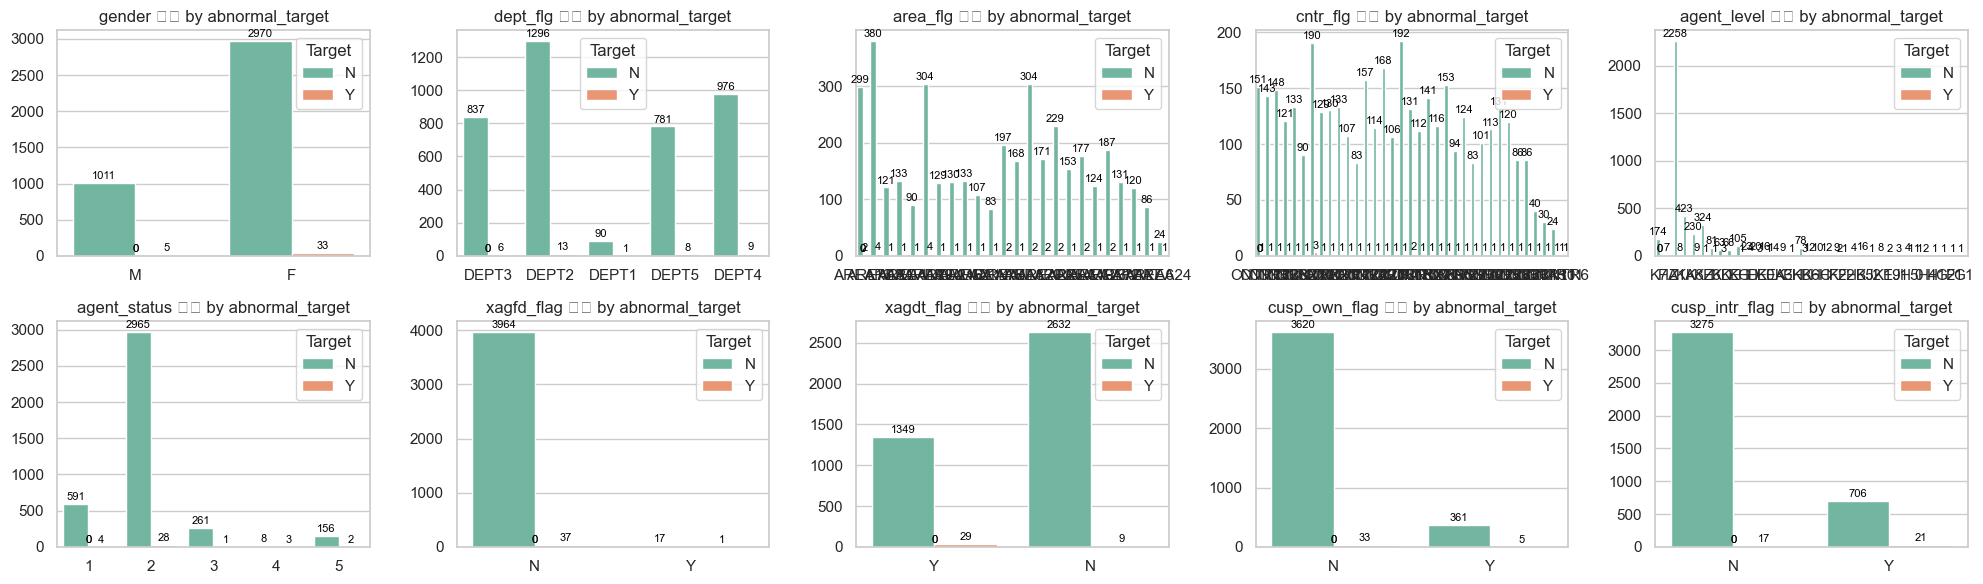

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# 類別型欄位清單
categorical_columns = [
    "gender", "dept_flg", "area_flg", "cntr_flg", "agent_level", "agent_status", 
    "xagfd_flag", "xagdt_flag", "cusp_own_flag", "cusp_intr_flag"
]

# 筆數設定（每列顯示幾張圖）
n_cols = 5
n_rows = ceil(len(categorical_columns) / n_cols)
figsize = (n_cols * 4, n_rows * 3)

# 建立子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.flatten()

# 顯示並列條形圖，並加上數字標籤
plotted = 0
for col in categorical_columns:
    ax = axes[plotted]
    sns.countplot(
        data=df_DATA,
        x=col,
        hue="abnormal_target",
        palette="Set2",
        ax=ax
    )
    
    # 在每個條形圖上加上數字
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',  # 顯示數值
            (p.get_x() + p.get_width() / 2., p.get_height()),  # 位置在條形上
            ha='center', va='center',  # 設置對齊
            fontsize=8, color='black',  # 字體顏色和大小
            xytext=(0, 5),  # 文字偏移
            textcoords='offset points'
        )
    
    ax.set_title(f"{col} 分布 by abnormal_target")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend(title="Target", labels=["N", "Y"])
    
    plotted += 1

# 移除多餘空格子
for i in range(plotted, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 儲存圖片
fig.savefig("output_plots/categorical_plots.png")



## 缺失值處理

In [43]:
# 假設 df_DATA 是你的 DataFrame
missing_counts = df_DATA.isnull().sum()

# 篩選出有缺失值的欄位
missing_columns = missing_counts[missing_counts > 0]

print(missing_columns)

dept_flg                        2
area_flg                        2
fyp_month_avg                1324
persistence_prem_25          3142
salary_ded_ratio             4001
age                             2
bill_invalid_ratio           3316
bill_invalid_cnt             3316
agent_own_plcy               2815
one_year_claim_plcy_cnt      2815
one_year_claim_plcy_ratio    2815
addr_not_vld_rate            2815
comm_amount_1y_rate          2815
pc_in_60_days_rate           2815
lapse_2y_rate                2815
dtype: int64


因為有很多column有缺失值 所以我先把每個column分成有缺失跟沒缺失 比較跟整體Y/N的比例
如果差異很小 → 補值
如果差異大 → 
    保留缺失不補
    或加上「是否缺失」作為新欄位
    或乾脆拆兩份模型也行（進階）

檢查缺失值是否影想TARGET

In [46]:
from statsmodels.stats.proportion import proportions_ztest

results = []
missing_cols = missing_counts[missing_counts > 0].index.tolist()
target_col = "abnormal_target"
df_DATA[target_col] = df_DATA[target_col].map({"N": 0, "Y": 1})

for col in missing_cols:
    temp = df_DATA[[col, target_col]].copy()
    temp["is_missing"] = temp[col].isnull()

    grp = temp.groupby("is_missing")[target_col].agg(["sum", "count"])
    count = grp["sum"].values.astype(int)
    nobs = grp["count"].values.astype(int)

    # 若缺失或非缺失的樣本數為 0 → 跳過
    if len(count) < 2 or nobs[0] == 0 or nobs[1] == 0:
        continue

    try:
        zstat, pval = proportions_ztest(count, nobs)
        y_rate_missing = count[1] / nobs[1]
        y_rate_not_missing = count[0] / nobs[0]

        results.append({
            "欄位": col,
            "缺失比例": round(nobs[1] / sum(nobs), 3),
            "有缺失的 Y 比例": f"{count[1]}/{nobs[1]} ({round(y_rate_missing, 4)})",
            "無缺失的 Y 比例": f"{count[0]}/{nobs[0]} ({round(y_rate_not_missing, 4)})",
            "差距": round(abs(y_rate_missing - y_rate_not_missing), 4),
            "p-value": round(pval, 5)
        })
    except Exception as e:
        print(f"[跳過] 欄位 {col} 發生錯誤：{e}")
        continue

df_missing_test = pd.DataFrame(results).sort_values("p-value")
df_missing_test


,欄位,缺失比例,有缺失的 Y 比例,無缺失的 Y 比例,差距,p-value
0,dept_flg,0.000,1/2 (0.5),37/4017 (0.0092),0.4908,0.00000
1,area_flg,0.000,1/2 (0.5),37/4017 (0.0092),0.4908,0.00000
2,fyp_month_avg,0.329,1/1324 (0.0008),37/2695 (0.0137),0.0130,0.00006
12,comm_amount_1y_rate,0.700,17/2815 (0.006),21/1204 (0.0174),0.0114,0.00062
11,addr_not_vld_rate,0.700,17/2815 (0.006),21/1204 (0.0174),0.0114,0.00062
10,one_year_claim_plcy_ratio,0.700,17/2815 (0.006),21/1204 (0.0174),0.0114,0.00062
9,one_year_claim_plcy_cnt,0.700,17/2815 (0.006),21/1204 (0.0174),0.0114,0.00062
8,agent_own_plcy,0.700,17/2815 (0.006),21/1204 (0.0174),0.0114,0.00062
14,lapse_2y_rate,0.700,17/2815 (0.006),21/1204 (0.0174),0.0114,0.00062
13,pc_in_60_days_rate,0.700,17/2815 (0.006),21/1204 (0.0174),0.0114,0.00062


# 處理類別型 dept_flg area_flg

In [12]:
# 填補缺失值
def fill_missing_with_mode(df, column, target_column):
    # 分別根據 abnormal_target 來計算眾數
    mode_y = df[df[target_column] == 1][column].mode()[0]  # abnormal_target = Y 的眾數
    mode_n = df[df[target_column] == 0][column].mode()[0]  # abnormal_target = N 的眾數

    # 根據 abnormal_target 填補缺失值
    df[column] = df.apply(lambda row: mode_y if pd.isnull(row[column]) and row[target_column] == 1 else
                         (mode_n if pd.isnull(row[column]) and row[target_column] == 0 else row[column]), axis=1)
    return df

# 填補 dept_flg 和 area_flg 的缺失值
df_DATA = fill_missing_with_mode(df_DATA, 'dept_flg', 'abnormal_target')
df_DATA = fill_missing_with_mode(df_DATA, 'area_flg', 'abnormal_target')

# 存成新的檔案
output_path = "G:/我的雲端硬碟/NCCU/Machine Learning and AI Case Implementation/NCCU_ML_AI/data/filled_data.xlsx"
df_DATA.to_excel(output_path, index=False)

# 確認檔案儲存完成
print(f"處理過的資料已儲存至 {output_path}")



處理過的資料已儲存至 G:/我的雲端硬碟/NCCU/Machine Learning and AI Case Implementation/NCCU_ML_AI/data/filled_data.xlsx


# 處理連續型

先檢定各個column在abnormal_target是Y和N時分別是不是常態

In [13]:
import pandas as pd
import numpy as np
from scipy import stats

# 常態檢定函數
def normality_test(data):
    _, p_value = stats.shapiro(data)  # 使用Shapiro-Wilk檢定
    return p_value

# 填補缺失值的函數
def fill_missing_with_mean_or_median(df, column, target_column):
    # 針對 abnormal_target 為 Y 和 N 的兩組資料進行處理
    for target_value in [0, 1]:  # 0: N, 1: Y
        temp_df = df[df[target_column] == target_value][column].dropna()

        # 檢查是否為常態分佈
        p_value = normality_test(temp_df)
        
        # 若是常態分佈，使用平均數填補，否則使用中位數填補
        if p_value > 0.05:  # 如果 p-value > 0.05，則接受為常態
            fill_value = temp_df.mean()
        else:
            fill_value = temp_df.median()

        # 填補缺失值
        df[column] = df.apply(lambda row: fill_value if pd.isnull(row[column]) and row[target_column] == target_value else row[column], axis=1)
    
    return df, p_value

# 檢查某個欄位常態性並記錄
def check_normality_and_fill(df, columns, target_col):
    results = []

    for col in columns:
        temp = df[[col, target_col]].dropna()
        
        # 記錄 Y 和 N 兩組的常態檢定結果
        p_value_y = normality_test(temp[temp[target_col] == 1][col])
        p_value_n = normality_test(temp[temp[target_col] == 0][col])

        # 添加結果到表格
        results.append({
            "欄位": col,
            "Y組常態檢定p-value": p_value_y,
            "N組常態檢定p-value": p_value_n
        })
    
    # 將結果存為DataFrame並返回
    normality_results = pd.DataFrame(results)
    return normality_results

# 定義需要進行處理的欄位
columns_to_check = [
    "fyp_month_avg", "comm_amount_1y_rate", "addr_not_vld_rate", "one_year_claim_plcy_ratio", "one_year_claim_plcy_cnt",
    "agent_own_plcy", "lapse_2y_rate", "pc_in_60_days_rate", "bill_invalid_cnt", "bill_invalid_ratio", "salary_ded_ratio", 
    "persistence_prem_25", "age"
]

# 檢查常態性
normality_results = check_normality_and_fill(df_DATA, columns_to_check, "abnormal_target")
normality_results


,欄位,Y組常態檢定p-value,N組常態檢定p-value
0,fyp_month_avg,0.000043,8.874199e-57
1,comm_amount_1y_rate,0.000044,2.384288e-34
2,addr_not_vld_rate,0.000316,5.300197e-53
3,one_year_claim_plcy_ratio,0.003730,2.542678e-46
4,one_year_claim_plcy_cnt,0.000068,5.274351e-43
5,agent_own_plcy,0.006624,2.580632e-37
6,lapse_2y_rate,0.000003,2.272404e-55
7,pc_in_60_days_rate,0.004862,4.848412e-24
8,bill_invalid_cnt,0.010732,7.053215e-32
9,bill_invalid_ratio,0.000047,1.198043e-37


## 填補資料

In [14]:
import pandas as pd
import numpy as np
from scipy import stats

# 讀取資料
file_path = r"G:\我的雲端硬碟\NCCU\Machine Learning and AI Case Implementation\NCCU_ML_AI\data\filled_data.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# 需要填補缺失值的連續型欄位
continuous_columns = [
    "fyp_month_avg", "persistence_prem_25", "salary_ded_ratio", "age", "register_until_now",
    "bill_invalid_ratio", "bill_invalid_cnt", "agent_own_plcy", "one_year_claim_plcy_cnt",
    "one_year_claim_plcy_ratio", "addr_not_vld_rate", "comm_amount_1y_rate", "pc_in_60_days_rate",
    "lapse_2y_rate"
] + [f"rule{i}_counts" for i in range(1, 40)]

# 填補缺失值並新增標記欄位
def fill_continuous_missing(df, column, target_column):
    # 根據 abnormal_target 分組
    df_y = df[df[target_column] == 1]
    df_n = df[df[target_column] == 0]
    
    # 進行常態檢定
    _, p_value_y = stats.shapiro(df_y[column].dropna())  # Y組的常態檢定
    _, p_value_n = stats.shapiro(df_n[column].dropna())  # N組的常態檢定
    
    # 填補缺失值
    if p_value_y >= 0.05:  # Y組符合常態分佈，使用平均數填補
        fill_value_y = df_y[column].mean()
    else:  # Y組不符合常態分佈，使用中位數填補
        fill_value_y = df_y[column].median()
        
    if p_value_n >= 0.05:  # N組符合常態分佈，使用平均數填補
        fill_value_n = df_n[column].mean()
    else:  # N組不符合常態分佈，使用中位數填補
        fill_value_n = df_n[column].median()
    
    # 將缺失值依據 abnormal_target 填補
    df[column + "_missing_flag"] = df[column].isnull().astype(int)  # 新增缺失標記欄位並轉換為 0 和 1
    df[column] = df.apply(lambda row: fill_value_y if pd.isnull(row[column]) and row[target_column] == 1 else
                         (fill_value_n if pd.isnull(row[column]) and row[target_column] == 0 else row[column]), axis=1)
    
    return df

# 對每個連續型欄位填補缺失值
for col in continuous_columns:
    df = fill_continuous_missing(df, col, "abnormal_target")

# 儲存結果
output_file_path = r"G:\我的雲端硬碟\NCCU\Machine Learning and AI Case Implementation\NCCU_ML_AI\data\filled_data.xlsx"
df.to_excel(output_file_path, index=False)

print(f"資料已儲存至 {output_file_path}")


資料已儲存至 G:\我的雲端硬碟\NCCU\Machine Learning and AI Case Implementation\NCCU_ML_AI\data\filled_data.xlsx


# others

In [2]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['age']) & (df_DATA['abnormal_target'] == 'Y')]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target


In [20]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['dept_flg']) & pd.isna(df_DATA['area_flg'])]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
2474,agnt_2475,M,NaN,NaN,CNTR6,0,2,597.75,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
3605,agnt_3606,F,NaN,NaN,CNTR6,0,5,5237.00,NaN,NaN,...,0,0,0,0,0,1,1,0,0,N


In [22]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['salary_ded_ratio']) & (df_DATA['abnormal_target'] == 'Y')]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
333,agnt_0334,F,DEPT2,AREA9,CNTR20,HD,2,41409.67,NaN,NaN,...,0,0,2,0,0,1,1,0,0,Y
334,agnt_0335,F,DEPT3,AREA8,CNTR16,K2,2,62528.69,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
351,agnt_0352,F,DEPT4,AREA19,CNTR30,Z1,2,46969.37,NaN,NaN,...,0,0,0,0,0,0,1,0,0,Y
374,agnt_0375,F,DEPT4,AREA17,CNTR28,Z1,2,32539.06,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
440,agnt_0441,F,DEPT4,AREA20,CNTR18,Z1,2,90020.86,0.00,NaN,...,0,0,3,0,0,1,1,0,0,Y
450,agnt_0451,F,DEPT4,AREA20,CNTR27,HE,2,332448.33,NaN,NaN,...,0,0,6,0,0,1,1,0,0,Y
593,agnt_0594,F,DEPT3,AREA4,CNTR26,KB,2,80859.44,92.76,NaN,...,0,0,15,0,0,1,1,0,0,Y
881,agnt_0882,F,DEPT5,AREA23,CNTR23,KH,4,34105.46,88.28,NaN,...,0,0,7,0,0,1,1,0,0,Y
1122,agnt_1123,F,DEPT3,AREA16,CNTR1,K8,2,31356.00,NaN,NaN,...,0,0,1,0,0,0,1,0,0,Y
1233,agnt_1234,F,DEPT2,AREA9,CNTR7,HD,1,162421.85,99.95,NaN,...,0,0,13,0,0,1,1,0,1,Y


In [8]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['persistence_prem_25']) & (df_DATA['abnormal_target'] == 'Y')]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
333,agnt_0334,F,DEPT2,AREA9,CNTR20,HD,2,41409.67,NaN,NaN,...,0,0,2,0,0,1,1,0,0,Y
334,agnt_0335,F,DEPT3,AREA8,CNTR16,K2,2,62528.69,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
351,agnt_0352,F,DEPT4,AREA19,CNTR30,Z1,2,46969.37,NaN,NaN,...,0,0,0,0,0,0,1,0,0,Y
374,agnt_0375,F,DEPT4,AREA17,CNTR28,Z1,2,32539.06,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
450,agnt_0451,F,DEPT4,AREA20,CNTR27,HE,2,332448.33,NaN,NaN,...,0,0,6,0,0,1,1,0,0,Y
1122,agnt_1123,F,DEPT3,AREA16,CNTR1,K8,2,31356.00,NaN,NaN,...,0,0,1,0,0,0,1,0,0,Y
1406,agnt_1407,F,DEPT2,AREA2,CNTR2,K8,2,50916.87,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
1536,agnt_1537,F,DEPT3,AREA13,CNTR13,KG,5,87332.42,NaN,NaN,...,0,0,6,0,0,1,1,0,0,Y
1887,agnt_1888,F,DEPT2,AREA18,CNTR12,Z1,2,244787.09,NaN,NaN,...,0,0,4,0,0,1,1,0,0,Y
2277,agnt_2278,F,DEPT4,AREA12,CNTR34,K2,2,121127.77,NaN,NaN,...,0,0,3,0,0,1,1,0,1,Y


In [9]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['salary_ded_ratio']) & (df_DATA['abnormal_target'] == 'Y')]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
333,agnt_0334,F,DEPT2,AREA9,CNTR20,HD,2,41409.67,NaN,NaN,...,0,0,2,0,0,1,1,0,0,Y
334,agnt_0335,F,DEPT3,AREA8,CNTR16,K2,2,62528.69,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
351,agnt_0352,F,DEPT4,AREA19,CNTR30,Z1,2,46969.37,NaN,NaN,...,0,0,0,0,0,0,1,0,0,Y
374,agnt_0375,F,DEPT4,AREA17,CNTR28,Z1,2,32539.06,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
440,agnt_0441,F,DEPT4,AREA20,CNTR18,Z1,2,90020.86,0.00,NaN,...,0,0,3,0,0,1,1,0,0,Y
450,agnt_0451,F,DEPT4,AREA20,CNTR27,HE,2,332448.33,NaN,NaN,...,0,0,6,0,0,1,1,0,0,Y
593,agnt_0594,F,DEPT3,AREA4,CNTR26,KB,2,80859.44,92.76,NaN,...,0,0,15,0,0,1,1,0,0,Y
881,agnt_0882,F,DEPT5,AREA23,CNTR23,KH,4,34105.46,88.28,NaN,...,0,0,7,0,0,1,1,0,0,Y
1122,agnt_1123,F,DEPT3,AREA16,CNTR1,K8,2,31356.00,NaN,NaN,...,0,0,1,0,0,0,1,0,0,Y
1233,agnt_1234,F,DEPT2,AREA9,CNTR7,HD,1,162421.85,99.95,NaN,...,0,0,13,0,0,1,1,0,1,Y


In [10]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['bill_invalid_ratio']) & pd.isna(df_DATA['bill_invalid_cnt'])]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
0,agnt_0001,M,DEPT3,AREA13,CNTR13,K7,3,30054.25,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
2,agnt_0003,M,DEPT3,AREA13,CNTR13,Z1,2,14618.46,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
3,agnt_0004,M,DEPT3,AREA13,CNTR35,Z1,2,42400.30,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
6,agnt_0007,M,DEPT3,AREA13,CNTR13,KA,2,38565.36,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
7,agnt_0008,M,DEPT3,AREA13,CNTR13,K8,2,23473.33,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,agnt_4015,F,DEPT3,AREA13,CNTR13,Z1,2,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N
4015,agnt_4016,F,DEPT3,AREA14,CNTR17,Z1,2,44524.35,NaN,NaN,...,0,0,3,0,0,1,1,0,0,N
4016,agnt_4017,M,DEPT3,AREA13,CNTR35,KA,2,36144.52,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N
4017,agnt_4018,F,DEPT2,AREA21,CNTR14,Z1,2,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N


In [11]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['agent_own_plcy']) & (df_DATA['abnormal_target'] == 'Y')]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
333,agnt_0334,F,DEPT2,AREA9,CNTR20,HD,2,41409.67,NaN,NaN,...,0,0,2,0,0,1,1,0,0,Y
334,agnt_0335,F,DEPT3,AREA8,CNTR16,K2,2,62528.69,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
351,agnt_0352,F,DEPT4,AREA19,CNTR30,Z1,2,46969.37,NaN,NaN,...,0,0,0,0,0,0,1,0,0,Y
374,agnt_0375,F,DEPT4,AREA17,CNTR28,Z1,2,32539.06,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
450,agnt_0451,F,DEPT4,AREA20,CNTR27,HE,2,332448.33,NaN,NaN,...,0,0,6,0,0,1,1,0,0,Y
1122,agnt_1123,F,DEPT3,AREA16,CNTR1,K8,2,31356.00,NaN,NaN,...,0,0,1,0,0,0,1,0,0,Y
1406,agnt_1407,F,DEPT2,AREA2,CNTR2,K8,2,50916.87,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
2277,agnt_2278,F,DEPT4,AREA12,CNTR34,K2,2,121127.77,NaN,NaN,...,0,0,3,0,0,1,1,0,1,Y
2439,agnt_2440,F,DEPT4,AREA12,CNTR21,K0,2,249302.57,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
2474,agnt_2475,M,NaN,NaN,CNTR6,0,2,597.75,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y


In [12]:
# 範例：column1 為 NaN，column2 為 b 的 row
filtered_df = df_DATA[pd.isna(df_DATA['agent_own_plcy']) & (df_DATA['abnormal_target'] == 'Y')]
filtered_df

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
333,agnt_0334,F,DEPT2,AREA9,CNTR20,HD,2,41409.67,NaN,NaN,...,0,0,2,0,0,1,1,0,0,Y
334,agnt_0335,F,DEPT3,AREA8,CNTR16,K2,2,62528.69,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
351,agnt_0352,F,DEPT4,AREA19,CNTR30,Z1,2,46969.37,NaN,NaN,...,0,0,0,0,0,0,1,0,0,Y
374,agnt_0375,F,DEPT4,AREA17,CNTR28,Z1,2,32539.06,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
450,agnt_0451,F,DEPT4,AREA20,CNTR27,HE,2,332448.33,NaN,NaN,...,0,0,6,0,0,1,1,0,0,Y
1122,agnt_1123,F,DEPT3,AREA16,CNTR1,K8,2,31356.00,NaN,NaN,...,0,0,1,0,0,0,1,0,0,Y
1406,agnt_1407,F,DEPT2,AREA2,CNTR2,K8,2,50916.87,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
2277,agnt_2278,F,DEPT4,AREA12,CNTR34,K2,2,121127.77,NaN,NaN,...,0,0,3,0,0,1,1,0,1,Y
2439,agnt_2440,F,DEPT4,AREA12,CNTR21,K0,2,249302.57,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y
2474,agnt_2475,M,NaN,NaN,CNTR6,0,2,597.75,NaN,NaN,...,0,0,0,0,0,1,1,0,0,Y


In [13]:
cols_to_check = [
    'agent_own_plcy',
    'one_year_claim_plcy_cnt',
    'one_year_claim_plcy_ratio',
    'addr_not_vld_rate',
    'comm_amount_1y_rate',
    'pc_in_60_days_rate',
    'lapse_2y_rate'
]

# 取出每欄是 NaN 的 index set
na_index_sets = [set(df_DATA[df_DATA[col].isna()].index) for col in cols_to_check]

# 取所有欄位 NaN row 的交集
common_na_index = set.intersection(*na_index_sets)

print(f"同時是 NaN 的 row 數量：{len(common_na_index)}")

同時是 NaN 的 row 數量：2815


In [14]:
cols_to_check = [
    'bill_invalid_ratio',
    'bill_invalid_cnt'
]
# 取出每欄是 NaN 的 index set
na_index_sets = [set(df_DATA[df_DATA[col].isna()].index) for col in cols_to_check]

# 取所有欄位 NaN row 的交集
common_na_index = set.intersection(*na_index_sets)

print(f"同時是 NaN 的 row 數量：{len(common_na_index)}")

同時是 NaN 的 row 數量：3316


In [16]:
filtered_df = df_DATA[pd.isna(df_DATA['agent_own_plcy']) & pd.isna(df_DATA['bill_invalid_ratio'])]
filtered_df
# ???

,serial_no,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,...,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts,abnormal_target
0,agnt_0001,M,DEPT3,AREA13,CNTR13,K7,3,30054.25,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
2,agnt_0003,M,DEPT3,AREA13,CNTR13,Z1,2,14618.46,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
3,agnt_0004,M,DEPT3,AREA13,CNTR35,Z1,2,42400.30,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
6,agnt_0007,M,DEPT3,AREA13,CNTR13,KA,2,38565.36,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
7,agnt_0008,M,DEPT3,AREA13,CNTR13,K8,2,23473.33,NaN,NaN,...,0,0,0,0,0,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,agnt_4015,F,DEPT3,AREA13,CNTR13,Z1,2,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N
4015,agnt_4016,F,DEPT3,AREA14,CNTR17,Z1,2,44524.35,NaN,NaN,...,0,0,3,0,0,1,1,0,0,N
4016,agnt_4017,M,DEPT3,AREA13,CNTR35,KA,2,36144.52,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N
4017,agnt_4018,F,DEPT2,AREA21,CNTR14,Z1,2,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,N
